## 6. Regression Analysis
Regression analysis is one of the powerful tools in econometrics and statistics used to examine relationships between variables. In particular, it is useful for understanding causal relationships between variables and for predicting variables given other variables.<br><br>
In this notebook, we basically use the <b>statsmodels</b> library, which provides rich functionality for statistical analysis including estimating statistical models and performing statistical tests. Particularly in regression analysis, statsmodels provides users with detailed summaries of results (like Stata), showing coefficient estimates, confidence intervals, p-values, and model goodness of fit. <br><br>
This notebook requires the basic Python programming skills described in the previous notebooks including data manipulation for dataframes and geographic representation using GeoPandas, as well as basic econometric and statistical knowledge.<br><br>
### 6.1. Simple Regression
In this section, we cover simple regression analysis with <b>statsmodels</b>.  First, we learn the basic commands for regression, and then go through a practical example. Specifically, we are going to conduct a regression analysis of the relationship between distance from the center of business and land prices.

#### Basic Commands
Using the <b>statsmodels</b> library, it is actually easy to perform simple regression analysis. First, let's prepare an example data as follows.

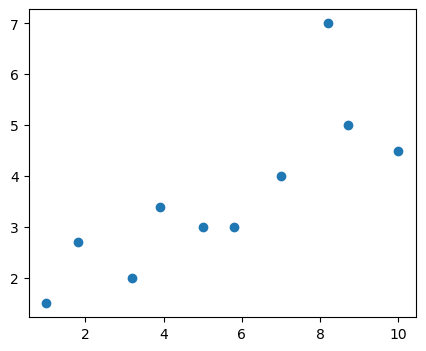

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df_example = pd.DataFrame({'x': [1, 1.8, 3.2, 3.9, 5, 5.8, 7, 8.2, 8.7, 10],
                           'y': [1.5, 2.7, 2, 3.4, 3, 3, 4, 7, 5, 4.5]})
plt.figure(figsize=(5,4))
plt.scatter(df_example['x'], df_example['y'])
plt.show()

To run an OLS regression, after importing <b>statsmodels.api</b> as <b>sm</b>, firstly create an <b>sm.OLS</b> object. We need to provide a dependent variable and independent variables to create it.  <b>sm.OLS</b> takes <b>array-like objects</b> including pandas dataframes (and series). In the following code, we store the data from the dataframe we just created in the variables X and y, and then input them into <b>sm.OLS</b>. Note that <b>sm.add_constant()</b> is a convenient function that adds a constant term to independent variables.

In [3]:
import statsmodels.api as sm

X = df_example['x']
y = df_example['y']


X = sm.add_constant(X)

model = sm.OLS(y, X) # create a model object

Once you created a model object, you can use the <b>.fit()</b> method to estimate the model parameters. This method returns the result of estimation, and you can use the <b>.summary()</b> method to summarize it.

In [4]:
model_result = model.fit()
print(model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     15.22
Date:                Mon, 12 Aug 2024   Prob (F-statistic):            0.00453
Time:                        16:51:17   Log-Likelihood:                -13.032
No. Observations:                  10   AIC:                             30.06
Df Residuals:                       8   BIC:                             30.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2694      0.678      1.874      0.0

C:\Anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Or you also can directly call <b>.fit()</b> method when you create a model object. This can reduce the number of lines of code a bit.

In [28]:
model = sm.OLS(y, X).fit() # create and estimate the model at the same time
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     15.22
Date:                Thu, 04 Apr 2024   Prob (F-statistic):            0.00453
Time:                        15:38:03   Log-Likelihood:                -13.032
No. Observations:                  10   AIC:                             30.06
Df Residuals:                       8   BIC:                             30.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2694      0.678      1.874      0.0

/Users/user/Desktop/RA/Python_tutorial/.tutorial/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


#### Practical Example: Land Value and Distance to Center of Business
In this example, we are going to conduct a regression analysis of the relationship between distance from the center of business and land prices.
#### Data
First, let's load the data and see what it looks like. We will visualize the data using GeoPandas, which we learned in Notebook 5. To do this, first load the .shp file containing the map information. As before, this analysis will focus only on Montgomery County and Prince George's County. (The .shp file is downloaded from https://www.census.gov/cgi-bin/geo/shapefiles/index.php)

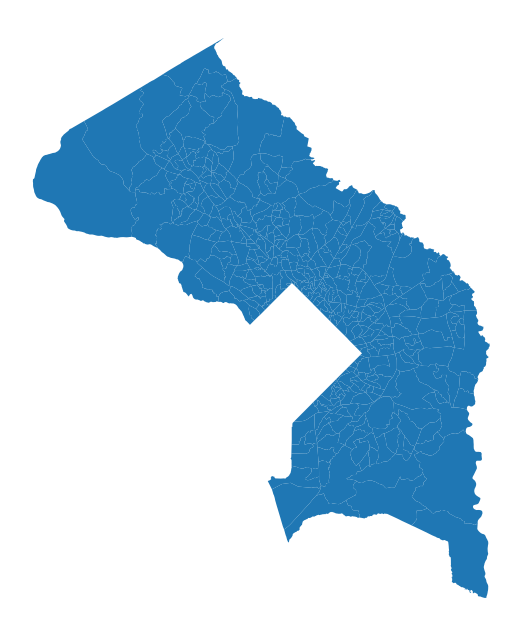

In [36]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np

pd.options.mode.copy_on_write = True 

maryland = gpd.read_file('tl_2010_24_tract10/tl_2010_24_tract10.shp')
mg_pg = maryland.query("COUNTYFP10 in ['031', '033']")
mg_pg.plot(figsize=(10, 8))
plt.axis('off') # To remove axis
plt.show()

As in the previous notebook, some data will be merged into the dataframe of map information. First, we will read and merge the data of land values for each census tract and then visualize it. (The data of land values is obtained from https://www.fhfa.gov/PolicyProgramsResearch/Research/Pages/wp1901.aspx)

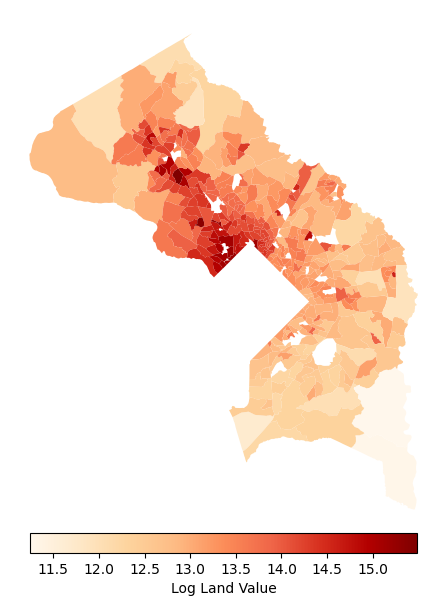

In [38]:
# These two lines creating keys for merging the data 
mg_pg['tract'] = mg_pg['TRACTCE10'].astype(int)
mg_pg['county'] = mg_pg['STATEFP10'].astype(int)*1000 + mg_pg['COUNTYFP10'].astype(int)

# Load land price data
df_lv = pd.read_csv('land_value.csv')
# Take logarithm
df_lv['log_land_value'] = np.log(df_lv['land_value'])
# Merge the data
mg_pg = pd.merge(mg_pg, df_lv, on=['county', 'tract'], how='left')
mg_pg.plot(figsize=(10, 8), cmap='OrRd', linewidth=0.1, column='log_land_value',legend=True, legend_kwds={"label": "Log Land Value", "orientation": "horizontal", "shrink": 0.5, "pad": 0},)
plt.axis('off')
plt.show()

Our hypothesis in this exercise is that "the shorter the distance from the center of business, the higher the land value." The reason behind this could be that people want to spend as little as possible on transportation costs for their economic activities. Since the nearest business center from Montgomery County and Prince George's County is DC, we can think of "distance to a business center" as the distance from each location to DC. <br><br>
The geographic representation seems already to support the hypothesis somewhat, but we will examine it in a formal statistical way using distance data. (The distance data is obtained from https://www.nber.org/research/data/tract-distance-database) The following code loads the distance data and merges it with the map dataframe. Also, it visualizes the distance data just in case although the result is quite obvious. 

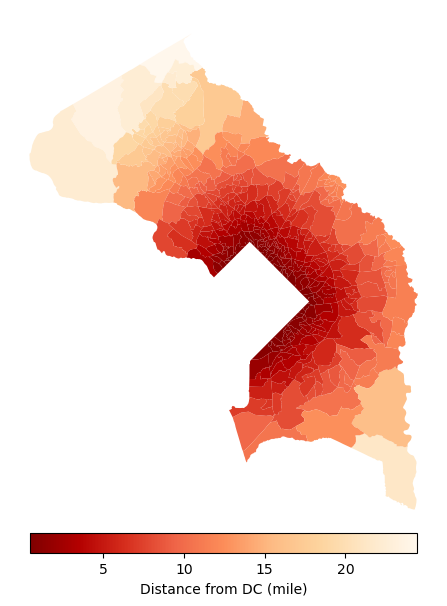

In [6]:
# Load land price data
df_mi = pd.read_csv('mi_to_dc.csv')

# Merge the data
mg_pg = pd.merge(mg_pg, df_mi, on=['county', 'tract'], how='left')
mg_pg.plot(figsize=(10, 8), cmap='OrRd_r', linewidth=0.1, column='mi_to_dc',legend=True, legend_kwds={"label": "Distance from DC (mile)", "orientation": "horizontal", "shrink": 0.5, "pad": 0},)
plt.axis('off')
plt.show()

Data loading is now complete. Before we begin the regression analysis, let's look at the relationship between the two in a scatter plot. Note that the process of grasping the characteristics of data through visualizations (including geographic representations) like this is called EDA (Exploratory Data Analysis), and it's an important process before conducting formal statistical analyses, such as regression analysis.

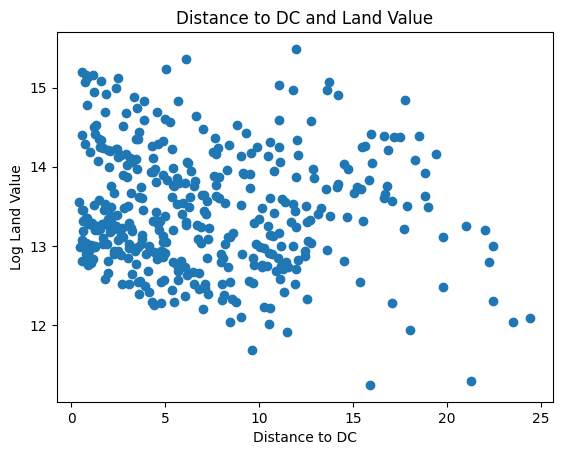

In [67]:
plt.scatter(mg_pg['mi_to_dc'], mg_pg['log_land_value'])
plt.xlabel('Distance to DC')
plt.ylabel('Log Land Value')
plt.title('Distance to DC and Land Value')
plt.show()

From the scatterplot, we can read that there seems to be a modest correlation between distance and land value. In the next section, we will actually perform the regression analysis.<br>
### 6.2 Running Regressions
Using the commands we learned in the previous section, let's estimate a linear regression model for the land value and the distance to DC.
$$
\log (land\;value_i) = \alpha + \beta\times(mile\;to\;DC_i) + \epsilon_i
$$

In [9]:
import statsmodels.api as sm

X = mg_pg['mi_to_dc']
y = mg_pg['log_land_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                nan
Time:                        17:36:53   Log-Likelihood:                    nan
No. Observations:                 433   AIC:                               nan
Df Residuals:                     431   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

However, as can be seen in the above result, all of the results show <b>nan</b>. It seems the estimation didn't work well. Why did this happen?<br><br>
This is due to <b>missing values</b> in our dataset. In practice we often need to handle values missing in data sets. Let's try to deal with missing values using the dataframe techniques we have learned in Notebook 4.
#### Dealing with Missing Values
The most straightforward way is to use <b>.drop</b>, which delete rows containing missing values (in any columns by default).

In [12]:
mg_pg_dropna = mg_pg[['log_land_value', 'mi_to_dc']].dropna()

X = mg_pg_dropna['mi_to_dc']
y = mg_pg_dropna['log_land_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.662
Date:                Mon, 12 Aug 2024   Prob (F-statistic):             0.0314
Time:                        17:39:01   Log-Likelihood:                -443.85
No. Observations:                 389   AIC:                             891.7
Df Residuals:                     387   BIC:                             899.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5571      0.065    206.982      0.0

Finally, we got the estimated parameters as above.<br><br>
Alternatively, you can fill missing values with some values. This is not really common in statistical inferences, but people sometimes do this for prediction tasks. For example, in the following example, missing values are filled with the means of each column by the <b>.fillna()</b> method.

In [14]:
mg_pg_fillna = mg_pg[['log_land_value', 'mi_to_dc']].fillna(mg_pg[['log_land_value', 'mi_to_dc']].mean())

X = mg_pg_fillna['mi_to_dc']
y = mg_pg_fillna['log_land_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.795
Date:                Mon, 12 Aug 2024   Prob (F-statistic):             0.0291
Time:                        17:39:48   Log-Likelihood:                -471.05
No. Observations:                 433   AIC:                             946.1
Df Residuals:                     431   BIC:                             954.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5455      0.058    232.248      0.0

### 6.3 Dealing with Outliers
Outliers can significantly distort the results of an analysis, so it is important to handle them appropriately. Let's practice a few methods with this data (though in this example there don't seem to be any extreme outliers as shown in the scatterplot).<br><br>
First, let's try to exclude outliers based on standard deviation. As an example here, we will remove observations where the land value exceeds 3sigma. As we learned in Notebook 5, the standard deviation can be easily calculated using the .std() method of dataframe. Using the <b>.loc</b> method for row selection in data frames, we create a new dataframe excluding outliers.

In [16]:
mean_land_value = mg_pg['log_land_value'].mean()
std_land_value = mg_pg['log_land_value'].std()
mg_pg_drop3s = mg_pg.loc[mg_pg['log_land_value'] < 3*std_land_value + mean_land_value, ['log_land_value', 'mi_to_dc']]

X = mg_pg_drop3s['mi_to_dc']
y = mg_pg_drop3s['log_land_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.662
Date:                Mon, 12 Aug 2024   Prob (F-statistic):             0.0314
Time:                        17:41:27   Log-Likelihood:                -443.85
No. Observations:                 389   AIC:                             891.7
Df Residuals:                     387   BIC:                             899.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5571      0.065    206.982      0.0

Instead of removing outliers, replacing those extreme values with specific upper (or lower) limits is often done (sometimes called <i>Winsorization</i>). <br><br>As an example, let's try to replace the data where land prices exceed the 99th percentile (i.e., the top 1% of the data) with the 99th percentile value in the following code. Remember the <b>.quantile()</b> method of dataframe calculate the percentile of the data. The <b>.clip()</b> method takes <b>lower</b> and/or <b>upper</b> arguments specifying threshold values and returns the data with the threshold values replaced by the observed values outside of them. (<b>lower</b> and <b>upper</b> are also positional arguments, first and second respectively).

In [18]:
p99_land_value = mg_pg['log_land_value'].quantile(0.99)
mg_pg_winsor = mg_pg.copy() # copy the original df
mg_pg_winsor['log_land_value'] = mg_pg['log_land_value'].clip(upper=p99_land_value)

Let's check the data by plotting scatter plots of the clipped and original data.

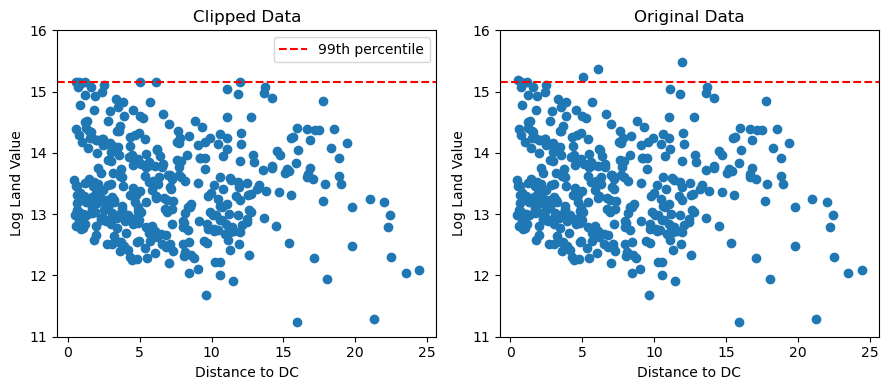

In [20]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.scatter(mg_pg_winsor['mi_to_dc'], mg_pg_winsor['log_land_value'])
plt.xlabel('Distance to DC')
plt.ylabel('Log Land Value')
plt.title('Clipped Data')
plt.ylim(11, 16)
plt.axhline(p99_land_value, color='red', linestyle='--', linewidth=1.5, label='99th percentile')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.scatter(mg_pg['mi_to_dc'], mg_pg['log_land_value'])
plt.xlabel('Distance to DC')
plt.ylabel('Log Land Value')
plt.title('Original Data')
plt.ylim(11, 16)
plt.axhline(p99_land_value, color='red', linestyle='--', linewidth=1.5) 

plt.tight_layout()
plt.show()

As in the figure above, you can confirm that the data are clipped if they exceed the 99th percentile.
### 6.4 Interpreting Results
Then, let us interpret the results. First, we re-estimate the model after excluding missing values as follows:

In [23]:
mg_pg_dropna = mg_pg[['log_land_value', 'mi_to_dc']].dropna()

X = mg_pg_dropna['mi_to_dc']
y = mg_pg_dropna['log_land_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     4.662
Date:                Mon, 12 Aug 2024   Prob (F-statistic):             0.0314
Time:                        20:43:02   Log-Likelihood:                -443.85
No. Observations:                 389   AIC:                             891.7
Df Residuals:                     387   BIC:                             899.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.5571      0.065    206.982      0.0

As you can see, this summary includes a statistical evaluation of the model, including coefficients, standard errors, t-values, p-values, and R-squared. In the above result, the coefficient of mi_to_dc is -0.0157, which means that for every 1-mile increase in distance to DC, land value decreases by 1.57%. The sign of this coefficient is consistent with our hypothesis. Statistical significance can also be easily checked since t-values and p-values are also displayed. The p-value of the coefficient of mi_to_dc is 0.031, meaning this coefficient is significant at the 5% level. Overall, the results suggest that our hypothesis is not inconsistent with the data.<br><br><br>
In evaluating the model, it is useful to check fitted values and residuals. First, let's display the fitted values on a scatterplot of the original data. The fitted model object (in this case, `model`) has the <b>.predict()</b> method that calculates predictions taking values of independent variables as an argument.

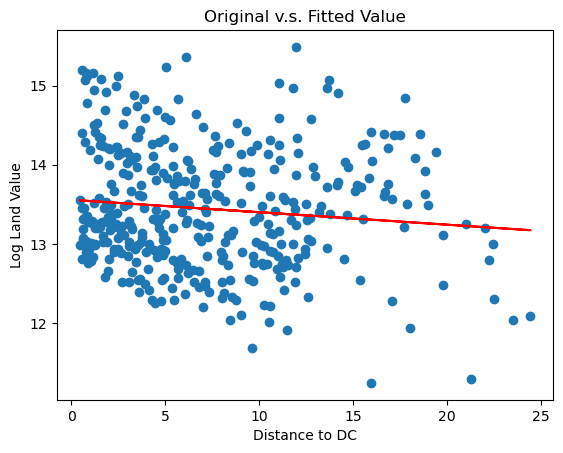

In [26]:
y_pred = model.predict(X) # fitted values returned

plt.scatter(mg_pg_dropna['mi_to_dc'], mg_pg_dropna['log_land_value']) # original data
plt.plot(mg_pg_dropna['mi_to_dc'], y_pred, color='red') # line plot of fitted data
plt.xlabel('Distance to DC')
plt.ylabel('Log Land Value')
plt.title('Original v.s. Fitted Value')
plt.show()

Next, let's create a figure plotting the fitted value vs. the residual. This will help you check to see if the model is failing to capture certain patterns in the data or if there is heteroskedasticity. The <b>.resid</b> attribute of the fitted model stores the residuals of the data used for estimation.

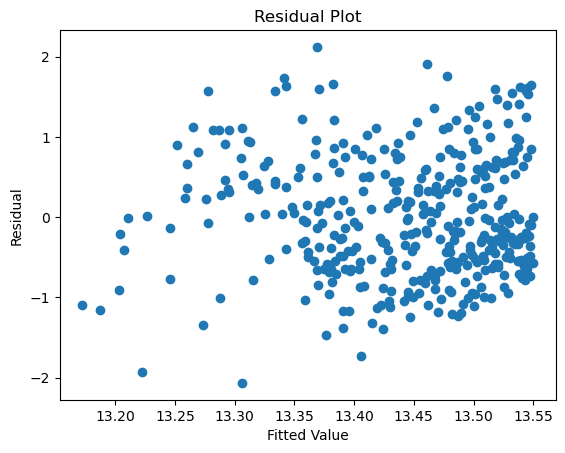

In [29]:
plt.scatter(y_pred, model.resid)
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

Looking at the plot above, there does not appear to be a significant problem with the residuals.<br><br>
### 6.5 Multivariate Regression
The method of performing a multivariate regression analysis using <b>statsmodels</b> is essentially the same as for a simple regression. You just need to put multiple variables in the independent variable X. Here we ook at some practical example of multivariate regressions.
#### Dummy Variable Regression
This example extends the model of the relationship between land price and distance to DC in the previous section. First, let's load and merge the data again just in case.

In [40]:
######## This code snippet is just a repetition of previous section ############

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm

pd.options.mode.copy_on_write = True 

maryland = gpd.read_file('tl_2010_24_tract10/tl_2010_24_tract10.shp')
mg_pg = maryland.query("COUNTYFP10 in ['031', '033']")

# These two lines creating keys for merging the data 
mg_pg['tract'] = mg_pg['TRACTCE10'].astype(int)
mg_pg['county'] = mg_pg['STATEFP10'].astype(int)*1000 + mg_pg['COUNTYFP10'].astype(int)

# Load land price data
df_lv = pd.read_csv('land_value.csv')
# Take logarithm
df_lv['log_land_value'] = np.log(df_lv['land_value'])
# Merge the data
mg_pg = pd.merge(mg_pg, df_lv, on=['county', 'tract'], how='left')

# Load land price data
df_mi = pd.read_csv('mi_to_dc.csv')

# Merge the data
mg_pg = pd.merge(mg_pg, df_mi, on=['county', 'tract'], how='left')

In the previous section, we performed a simple regression analysis regressing land prices on distance to DC. The analysis has already yielded a statistically significant result, but is there a way to get sharper estimates? To explore this possibility, let's plot land prices on a map again.

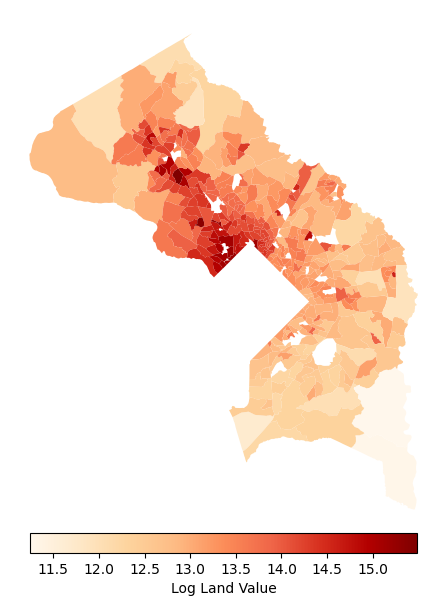

In [42]:
mg_pg.plot(figsize=(10, 8), cmap='OrRd', linewidth=0.1, column='log_land_value',legend=True, legend_kwds={"label": "Log Land Value", "orientation": "horizontal", "shrink": 0.5, "pad": 0},)
plt.axis('off')
plt.show()

Recall that this data includes data for two counties, Montgomery County and Prince George's County. From the map above, it appears that land values are somewhat higher in Montgomery County (west side of the map). To confirm this, let's draw a scatterplot for the two counties.

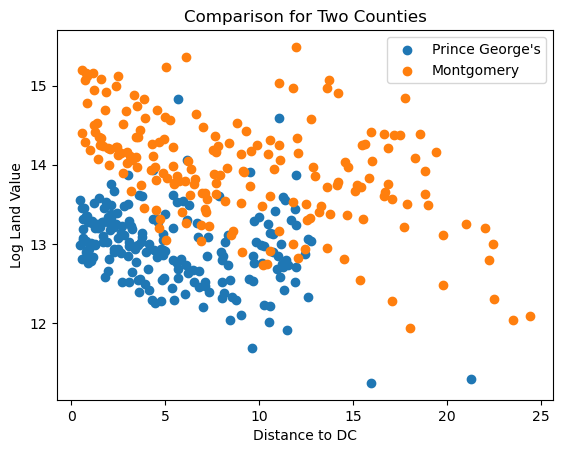

In [44]:
mg = mg_pg[mg_pg['county']==24031] # Select Montgomery County
pg = mg_pg[mg_pg['county']==24033] # Select Prince George's County

plt.scatter(pg['mi_to_dc'], pg['log_land_value'], label='Prince George\'s')
plt.scatter(mg['mi_to_dc'], mg['log_land_value'], label='Montgomery')
plt.legend(loc='upper right')
plt.xlabel('Distance to DC')
plt.ylabel('Log Land Value')
plt.title('Comparison for Two Counties')
plt.show()

Clearly, Montgomery County tends to have higher land values than Prince George's County for the same distance from DC. While this tendency does not necessarily distort the parameter of the simple regression analysis, adjusting for the difference in the level of the two counties is likely to reduce the variance of the estimates and give sharper estimation results.<br><br>
This difference can be controlled by adding a dummy variable to the regression equation as shown below.
$$
\log (land\;value_i) = \alpha + \beta\times(mile\;to\;DC_i) + \gamma\times (Montgomery\;dummy_i)+\epsilon_i
$$
The Montgomery dummy takes 1 if the observation is of Montgomery County, and 0 if Prince George's County. The coefficient of the dummy captures the difference in the levels between the two counties.<br><br>
To create such dummy variables, the easiest way is to use the <b>pd.get_dummies()</b> function. This function takes a categorical variable as input, and returns dummy variables for each category. Let's look at the following code.

In [48]:
pd.get_dummies(mg_pg['county'])

,24031,24033
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
428,True,False
429,True,False
430,True,False
431,True,False


In our data, `county` takes two values: `24031` for Montgomery County, and `24033` for Prince George's County. Given this as an input, <b>pd.get_dummies()</b> returns a dataframe that contains dummy variables for `24031` and `24033`. By default, these dummy variables are returned as False and True instead of 0 and 1. Since we use them in a regression analysis as a variable, we add  `dtype=float` to the arguments to convert False and True into 0 and 1.

In [50]:
pd.get_dummies(mg_pg['county'], dtype=float)

,24031,24033
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
428,1.0,0.0
429,1.0,0.0
430,1.0,0.0
431,1.0,0.0


Now, let's actually add the dummy variables created in this way to the regression analysis. In the code below, we store the independent variable in X as before.

In [52]:
mg_pg_w_dummy = pd.concat([mg_pg, pd.get_dummies(mg_pg['county'], dtype=float)], axis=1) # merge dummy df to the original df
mg_pg_w_dummy.rename(columns={24031: 'Montgomery'}, inplace=True) # Originally, 24031 is the name of the Montgomery dummy. Rename this to 'Montgomery' for readability of the code

mg_pg_dropna = mg_pg_w_dummy[['log_land_value', 'mi_to_dc', 'Montgomery']].dropna()

X = mg_pg_dropna[['mi_to_dc', 'Montgomery']] # select multiple columns for multivariate regression
y = mg_pg_dropna['log_land_value']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     209.1
Date:                Mon, 12 Aug 2024   Prob (F-statistic):           3.04e-62
Time:                        20:55:38   Log-Likelihood:                -303.43
No. Observations:                 389   AIC:                             612.9
Df Residuals:                     386   BIC:                             624.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2489      0.048    274.950      0.0

As you can see from the results above, the Montgomery dummy is significant at the 1% level, and as a magnitude, land values of the Montgomery county are about twice as high as Prince George's county for the same distance from DC. And, more importantly, the magnitude of the mi_to_dc coefficient is larger and the standard error is smaller than in the simple regression analysis. As a result, the absolute value of the t-value is much larger and the p-value is lower, which means that the estimation results got sharper by controlling the difference between the counties.<br><br>
### 6.6 Nonlinear Functional Forms with Regression Analysis
Next, let's consider the potential nonlinearity in the relationship between land price and distance to DC. In regression analysis, the simplest way to capture nonlinear relationships is to add the squared terms of the explanatory variables to the equation. This means that the regressors now contain non-linear transformations of the orignal variables. The model is still a linear combination of these regressors, but the functional relationship between outcomes and covariates is now nonlinear. As an example, we add a squared term to the dummy regression model described above. 
$$
\log (land\;value_i) = \alpha + \beta\times(mile\;to\;DC_i) + \delta\times(mile\;to\;DC_i)^2 + \gamma\times (Montgomery\;dummy_i)+\epsilon_i
$$
If you want to create a new column by squaring one column of a data frame, you can use <b>np.square()</b> from the numpy package.

In [55]:
mg_pg_dropna['mi_to_dc_sq'] = np.square(mg_pg_dropna['mi_to_dc'])

Once you have created the columns for the squared terms, you can then run the regression analysis as before.

In [57]:
X = mg_pg_dropna[['mi_to_dc', 'mi_to_dc_sq', 'Montgomery']] # include 'mi_to_dc_sq'
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         log_land_value   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     139.6
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           3.23e-61
Time:                        17:15:57   Log-Likelihood:                -303.00
No. Observations:                 389   AIC:                             614.0
Df Residuals:                     385   BIC:                             629.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          13.2039      0.068    193.274      

As shown in the results above, the squared term is not statistically significant implying there is not a very strong nonlinearity between land prices and distance to DC. Nevertheless, as an exercise, let us calculate the <i>marginal effect</i> of `mi_to_dc` on land prices. Recall that the marginal effect is a measure of how the  the conditional expectation of the dependent variable changes when the independent variable changes by one unit. The marginal effect of an independent variable is calculated as the derivative of the regression function for the dependent variable with respect to the independent variable. Particularly, in our case, the marginal effect is as follows:
$$
\frac{\partial \log (land\;value_i)}{\partial (mile\;to\;DC_i)} = \beta + 2\delta \times (mile\;to\;DC_i)
$$
There are several ways of how to report marginal effects. Here we evalute the marginal effect at the mean. Recall that the marginal effect depends on the value of the independent variable. Let us calculate the marginal effect at the mean value of `mi_to_dc`. As explained in Notebook 4, the <b>.mean()</b> method of dataframe allows for easy calculation of the mean value.

In [61]:
mg_pg_dropna.mean()

log_land_value    13.442639
mi_to_dc           7.275168
Montgomery         0.493573
mi_to_dc_sq       80.864671
dtype: float64

Substitute this value into the previous formula to obtain the marginal effect. To get the estimated parameters from the `model` object, use the <b>.params</b> attribute. For example, to retrieve the coefficient of `mi_to_dc`, you write `model.params['mi_to_dc']`.

In [63]:
print('coef of mi_to_dc:')
print(model.params['mi_to_dc'])
print('coef of mi_to_dc_sq:')
print(model.params['mi_to_dc_sq'])

coef of mi_to_dc:
-0.03701007571344337
coef of mi_to_dc_sq:
-0.0007614230453268588


Finally, the marginal effects are calculated as follows:

In [66]:
me = model.params['mi_to_dc'] + 2 * model.params['mi_to_dc_sq'] * mg_pg_dropna.mean()['mi_to_dc']

print(f'Marginal effect at mean: {me}')

Marginal effect at mean: -0.04808903657754568


Now, using the <i>delta method</i>, let's try to calculate the standard error of the marginal effect we calculated above. Remember, in general, a function of a random variable $X$ (assumed to have asymptotic normality) can be approximated by Taylor expansion around its mean as follows:
$$
g(X) \approx g(\mu_X)+\nabla g(\mu_X)' (X-\mu_X)
$$
Using this approximation, the variance of $g(X)$ will be as follows:
$$
V[g(X)] \approx \nabla g(\mu_X)' V[X] \nabla g(\mu_X)
$$
Applying this to our case,
$$
g(\hat{\beta},\hat{\delta}) = \hat{\beta} + 2\hat{\delta} \times \overline{(mile\;to\;DC)}\\
\nabla g(\hat{\beta},\hat{\delta}) =
\begin{pmatrix}
  1 \\ 
  2\times\overline{(mile\;to\;DC)}
\end{pmatrix} 
$$
The vector $\nabla g(\hat{\beta},\hat{\delta})$ can be expressed using the <b>np.array</b> object as follows:

In [68]:
deltag = np.array([[1],[2*mg_pg_dropna.mean()['mi_to_dc']]]) # vertical vector

Note that the <b>np.array</b> has the <b>.transpose()</b> method that returns the transpose of the matrix.

In [15]:
deltag.transpose()

array([[ 1.        , 14.55033563]])

In addition, as shown in the previous equations, we need the variance-covariance matrix of the parameters. To obtain it, we can use the <b>.cov_params()</b> method of the model object.

In [72]:
# Show variance matrix
model.cov_params()

,const,mi_to_dc,mi_to_dc_sq,Montgomery
const,0.004667,-0.000909,3.962870e-05,-0.001090
mi_to_dc,-0.000909,0.000267,-1.263773e-05,-0.000029
mi_to_dc_sq,0.000040,-0.000013,6.698565e-07,-0.000004
Montgomery,-0.001090,-0.000029,-3.757955e-06,0.003258


For now, we only need the variance-covariance matrix for mi_to_dc and mi_to_dc_sq. To obtain it, we can use <b>.loc()</b> method as follows:

In [74]:
model.cov_params().loc[['mi_to_dc', 'mi_to_dc_sq'], ['mi_to_dc', 'mi_to_dc_sq']]

,mi_to_dc,mi_to_dc_sq
mi_to_dc,0.000267,-1.263773e-05
mi_to_dc_sq,-0.000013,6.698565e-07


The above object is still a dataframe. We can convert this into a matrix (np.array) using <b>.to_numpy()</b> method.

In [76]:
covmat = model.cov_params().loc[['mi_to_dc', 'mi_to_dc_sq'], ['mi_to_dc', 'mi_to_dc_sq']].to_numpy()

Finally, we can calculate the standard error of the marginal effect. We use the <b>np.matmul()</b> function to calculate matrix multiplication.

In [78]:
var_me = np.matmul(np.matmul(deltag.transpose(), covmat), deltag)
std_me = np.sqrt(var_me[0][0]) # var_me is 1 by 1 matrix. Adding [0][0] converts it into a scalar.

print(f'Standard Error: {std_me}')

Standard Error: 0.006437272085480403


So far we calculated by hand the marginal effects of the quadratic model and its standard errors. However, this calculation was a bit tedious, and it may be a good idea to combine Stata in such cases because it has a command that automatically calculates these values. How to call Stata commands from Python will be explained in Notebook 8.

### 6.7 Model Prediction
For the last example of multivariate regression, let's try to do a prediction task. Specifically, we predict the land value of an area given various characteristics of the area. Prediction is another application of regression analysis in addition to causal analysis.<br><br>
$$
\log (land\;value_i) = \alpha + \sum\beta_j\times(characteristics\;j_i) +\epsilon_i
$$
While exogeneity of independent variables is a necessary condition if one wishes to analyze causality, such a condition is not particularly necessary in the case of forecasting. Here we will again use the Atlas data to extend the land value dataset and make predictions using a variety of variables.<br><br>
First, let's load and merge the land value data again just in case.

In [80]:
######## This code snippet is just a repetition of previous section ############

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import statsmodels.api as sm

maryland = gpd.read_file('tl_2010_24_tract10/tl_2010_24_tract10.shp')
mg_pg = maryland.query("COUNTYFP10 in ['031', '033']")

# These two lines creating keys for merging the data 
mg_pg['tract'] = mg_pg['TRACTCE10'].astype(int)
mg_pg['county'] = mg_pg['STATEFP10'].astype(int)*1000 + mg_pg['COUNTYFP10'].astype(int)

# Load land price data
df_lv = pd.read_csv('land_value.csv')
# Take logarithm
df_lv['log_land_value'] = np.log(df_lv['land_value'])
# Merge the data
mg_pg = pd.merge(mg_pg, df_lv, on=['county', 'tract'], how='left')

# Load land price data
df_mi = pd.read_csv('mi_to_dc.csv')

# Merge the data
mg_pg = pd.merge(mg_pg, df_mi, on=['county', 'tract'], how='left')

Next, we combine the dataframe with the Atlas dataset.

In [82]:
df_at = pd.read_csv('atlas.csv')

# Format the county code to that of the land value data set
df_at['county'] = df_at['state'].astype(int)*1000 + df_at['county'].astype(int)

# merge the data
mg_pg = pd.merge(mg_pg, df_at, on=['county', 'tract'])

# create county dummy
mg_pg = pd.concat([mg_pg, pd.get_dummies(mg_pg['county'], dtype=float)], axis=1)

# rename county dummy
mg_pg.rename(columns={24031: 'Montgomery', 24033: 'Prince Georges'}, inplace=True)

# keep only necessary columns
mg_pg = mg_pg[['tract', 'county', 'log_land_value', 'mi_to_dc', 'hhinc_mean2000', 'mean_commutetime2000',
       'frac_coll_plus2010', 'frac_coll_plus2000', 'foreign_share2010',
       'med_hhinc2016', 'med_hhinc1990', 'popdensity2000', 'poor_share2010',
       'poor_share2000', 'poor_share1990', 'share_black2010', 'share_hisp2010',
       'share_asian2010', 'share_black2000', 'share_white2000',
       'share_hisp2000', 'gsmn_math_g3_2013', 'singleparent_share1990',
       'singleparent_share2000', 'traveltime15_2010', 'emp2000',
       'mail_return_rate2010', 'jobs_total_5mi_2015', 'jobs_highpay_5mi_2015',
       'nonwhite_share2010', 'popdensity2010', 'ann_avg_job_growth_2004_2013',
       'job_density_2013', 'count_pooled', 'count_white', 'count_black',
       'count_asian', 'count_hisp', 'count_natam', 'Montgomery']]

# drop rows contain NA
mg_pg.dropna(inplace=True)

mg_pg.head(5)

,tract,county,log_land_value,mi_to_dc,hhinc_mean2000,mean_commutetime2000,frac_coll_plus2010,frac_coll_plus2000,foreign_share2010,med_hhinc2016,...,popdensity2010,ann_avg_job_growth_2004_2013,job_density_2013,count_pooled,count_white,count_black,count_asian,count_hisp,count_natam,Montgomery
0,801308,24033,12.660963,6.824885,137355.420,46.265860,0.394717,0.311641,0.082126,115060.0,...,3558.64800,-0.058677,158.051680,994.0,25.0,804.0,101.0,16.0,5.0,0.0
1,801302,24033,11.682668,9.635456,126917.080,42.064850,0.284108,0.355738,0.063845,119583.0,...,251.00992,-0.010738,40.488430,643.0,329.0,248.0,20.0,13.0,9.0,0.0
2,801307,24033,12.291332,5.500694,148954.060,44.865560,0.486439,0.380324,0.124059,103804.0,...,1091.34180,-0.000566,407.616760,735.0,57.0,549.0,60.0,35.0,6.0,0.0
3,800701,24033,12.634603,6.194927,126930.914,41.143110,0.319029,0.293853,0.043329,125818.0,...,505.38742,0.066875,101.002525,1239.0,93.0,1059.0,9.0,30.0,1.0,0.0
4,802203,24033,12.552142,3.690182,84904.445,39.933395,0.160680,0.144882,0.083681,62391.0,...,3186.17380,-0.014830,1179.329200,1263.0,41.0,1154.0,9.0,24.0,5.0,0.0


The data set is now ready. Next, the first important step in performing the forecasting task is to separate the data for fitting and the data for evaluating forecast accuracy. This is because in-sample goodness of fit is inadequate to assess the accuracy of the model's predictions, and it is important to check the accuracy of out-of-sample predictions. (When a model is evaluated based solely on how good the in-sample fit is, the parameters will fit the noise in the data and the out-of-sample prediction accuracy will decrease. This is called overfitting or overlearning.)<Br><br>
The easiest way to split the fitting data and the data for evaluation (here referred to as train and test data, respectively) is to use the <b>train_test_split</b> function in the <b>sklearn</b> library. (<b>Sklearn</b> is a Python library designed for machine learning. In fact, this library can also be used for multivariate regression analysis, but for this exercise, we will stick to <b>statsmodels</b>, which we have already learned.)<br><br>
In the following code, <b>train_test_split</b> randomly split outcome variable `y` and indepenent variables `X` into train and test data. `test_size=0.2` specifies the size of test data, meaning 20% of the data set is used as test data.`random_state=1` specifies the random seed.

In [84]:
from sklearn.model_selection import train_test_split

y = mg_pg['log_land_value']
X = mg_pg.drop(columns=['log_land_value', 'tract', 'county'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In this exercise, we will estimate three different models with different numbers of variables used in the forecast. First, the smallest model includes only the distance to DC and the Montgomery dummy. The medium size model is a 20-variable model (half of all variables) with the addition of the variables with the highest correlation coefficients. The largest model includes all variables in the data set.

In [88]:
var_small = ['mi_to_dc', 'Montgomery']

var_medium = ['mi_to_dc',
            'Montgomery',
            'traveltime15_2010',
            'popdensity2010',
            'frac_coll_plus2000',
            'job_density_2013',
            'singleparent_share2000',
            'jobs_highpay_5mi_2015',
            'poor_share2010',
            'foreign_share2010',
            'mean_commutetime2000',
            'emp2000',
            'count_pooled',
            'mail_return_rate2010',
            'share_black2010',
            'count_asian',
            'share_asian2010',
            'poor_share1990',
            'singleparent_share1990',
            'count_natam']

Fitting will be performed for each model to evaluate the accuracy of out-of-sample predictions. First, we will fit the smallest model. Note that only train data should be used.

In [90]:
import statsmodels.api as sm

X_small_train = X_train[var_small] # selecting variables for the small model
X_small_train = sm.add_constant(X_small_train)

model = sm.OLS(y_train, X_small_train).fit()

Create an out-of-sample prediction for this model. This can easily be done with the <b>.predict()</b> method described in the previous section.

In [92]:
X_small_test = X_test[var_small] # selecting variables for the small model
X_small_test = sm.add_constant(X_small_test)

y_pred = model.predict(X_small_test) # predicted values for test

Here we use RMSE to evaluate the prediction accuracy. (Note that lower RMSE is better.) <b>Sklearn</b> library provides a function called <b>root_mean_squared_error()</b> that calculates RMSE by simply entering actual and predicted values.

In [94]:
from sklearn.metrics import root_mean_squared_error

rmse_small_model = root_mean_squared_error(y_test, y_pred) # calculate RMSE
print(f'Out-of-Sample RMSE (small model) = {rmse_small_model}')

rmse_out_of_sample = []
rmse_out_of_sample.append(rmse_small_model) # store the result

Out-of-Sample RMSE (small model) = 0.5749706650737539


As a result, the out-of-sample prediction accuracy of the small model is 0.57 in terms of RMSE. Repeat the same for the medium and large models.

In [97]:
# Medium model
X_medium_train = X_train[var_medium] # selecting variables for the medium model
X_medium_train = sm.add_constant(X_medium_train)

model = sm.OLS(y_train, X_medium_train).fit()

X_medium_test = X_test[var_medium]
X_medium_test = sm.add_constant(X_medium_test)

y_pred = model.predict(X_medium_test) # predicted values for test data

rmse_medium_model = root_mean_squared_error(y_test, y_pred) # calculate RMSE
print(f'Out-of-Sample RMSE (medium model) = {rmse_medium_model}')

rmse_out_of_sample.append(rmse_medium_model) # store the result

Out-of-Sample RMSE (medium model) = 0.423307578044724


In [99]:
# Large model
X_large_train = X_train # large model uses all variables
X_large_train = sm.add_constant(X_large_train)

model = sm.OLS(y_train, X_large_train).fit()

X_large_test = X_test
X_large_test = sm.add_constant(X_large_test)

y_pred = model.predict(X_large_test) # predicted values for test data

rmse_large_model = root_mean_squared_error(y_test, y_pred) # calculate RMSE
print(f'Out-of-Sample RMSE (large model) = {rmse_large_model}')

rmse_out_of_sample.append(rmse_large_model) # store the result

Out-of-Sample RMSE (large model) = 0.4166250569577661


We evaluated the prediction error for all models. Let's display the results in a bar chart as follows:

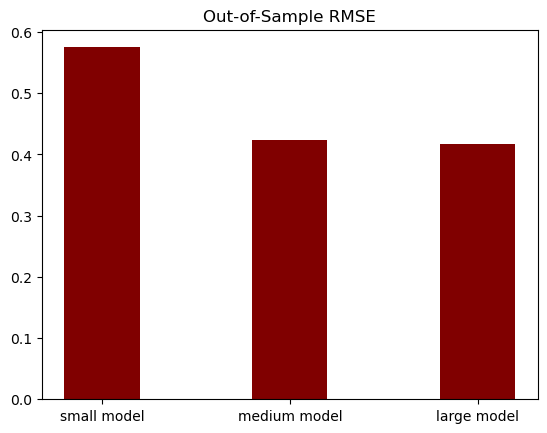

In [101]:
plt.bar(['small model', 'medium model', 'large model'], rmse_out_of_sample, color ='maroon', width = 0.4)
plt.title('Out-of-Sample RMSE')
plt.show()

While there was a significant improvement in accuracy when variables were increased from the small model to the medium model, the performance of the medium and large models is nearly identical.<br><br>
In general, as more variables are added, in-sample fit improves, but improving out-of-sample forecast accuracy becomes more difficult due to overfitting issues.